From https://www.youtube.com/watch?v=bemDFpNooA8

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4628 - accuracy: 0.6613 - val_loss: 0.8452 - val_accuracy: 0.6806
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7522 - accuracy: 0.7079 - val_loss: 0.7244 - val_accuracy: 0.7366
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6722 - accuracy: 0.7356 - val_loss: 0.6510 - val_accuracy: 0.7572
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5803 - accuracy: 0.7944 - val_loss: 0.7021 - val_accuracy: 0.7686
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5604 - accuracy: 0.8044 - val_loss: 0.5445 - val_accuracy: 0.8093
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5104 - accuracy: 0.8217 - val_loss: 0.6567 - val_accuracy: 0.7593
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5061 - accuracy: 0.8261 - val_loss: 0.5558 - val_accuracy:

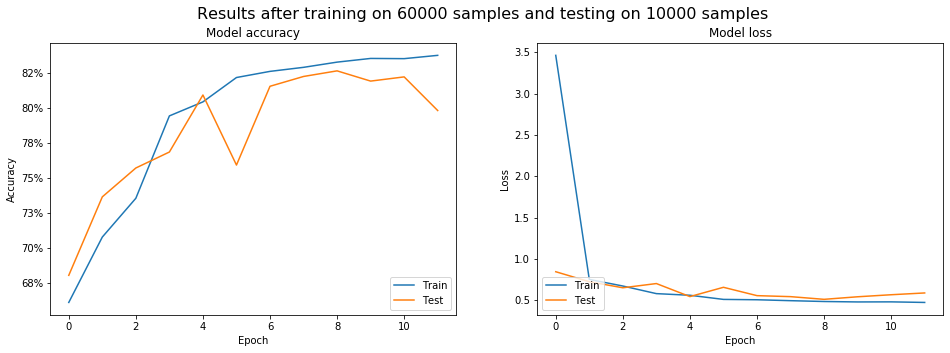

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Results after training on %i samples and testing on %i samples' 
                 % (len(train_images), len(test_images)), fontsize=16)

# summarize history for accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='lower right')

# summarize history for loss
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='lower left')

plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7982


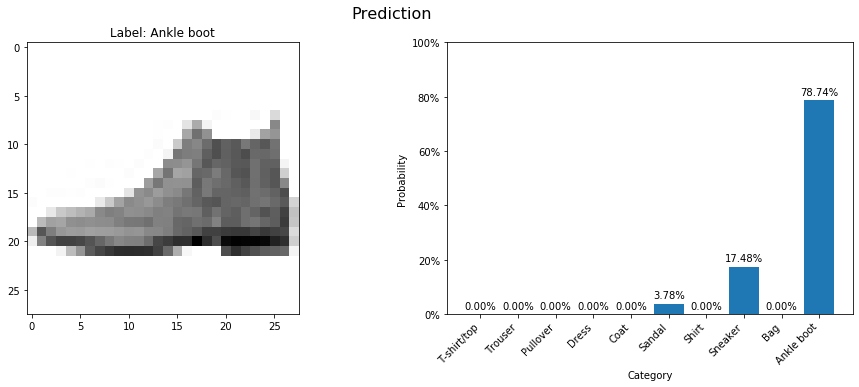

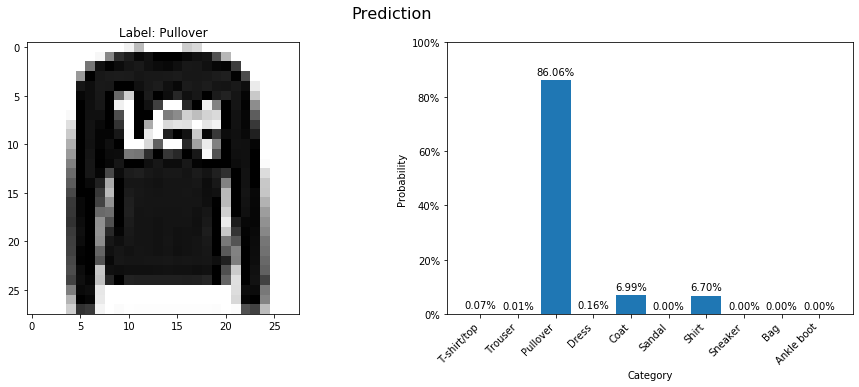

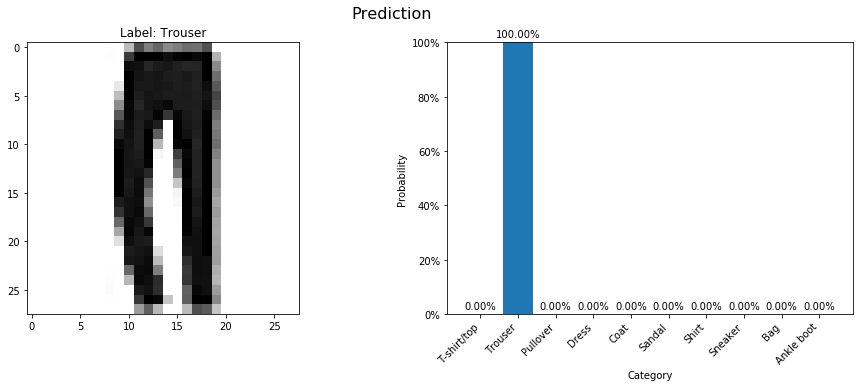

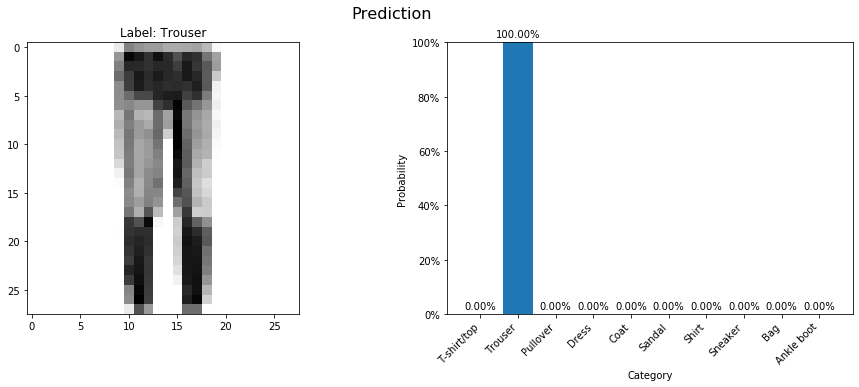

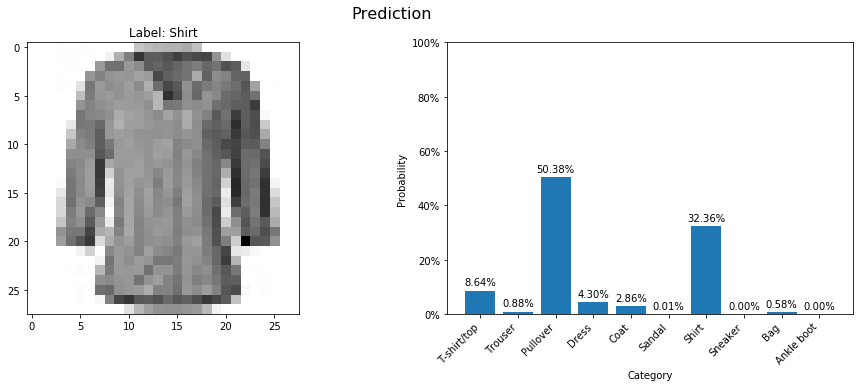

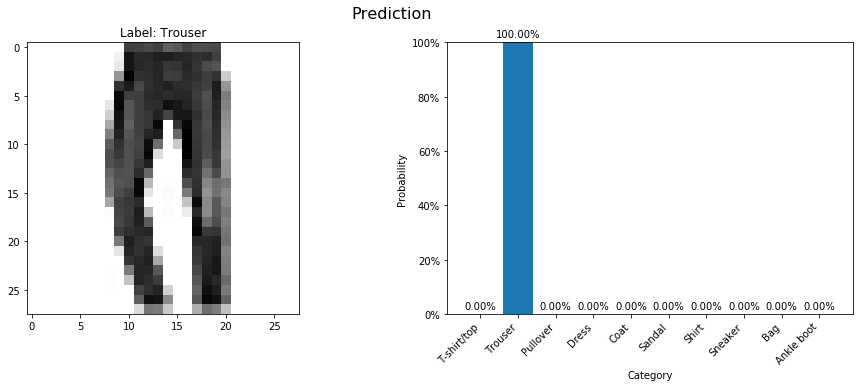

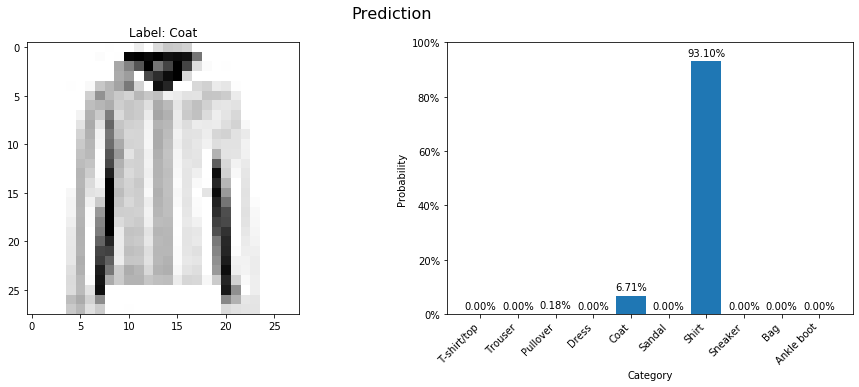

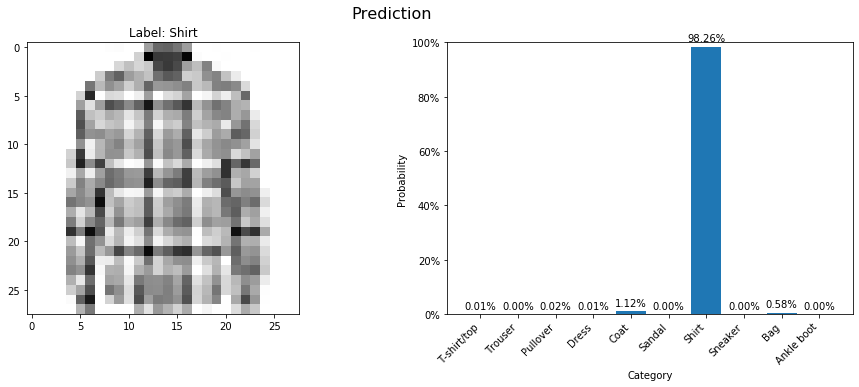

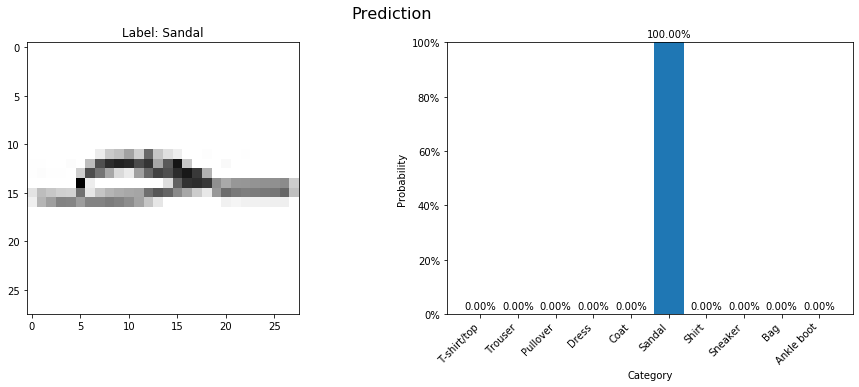

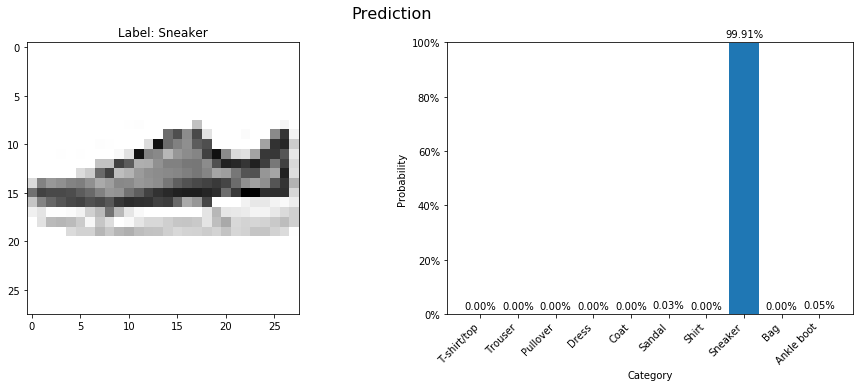

In [66]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

num = 10
images = test_images[:num]
labels = test_labels[:num]

result = model.predict(images)

for i in range(len(result)):    
    fig, axes = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle('Prediction', fontsize=16)
    axes[0].imshow(images[i], cmap='gray_r')
    axes[0].set_title('Label: {}'.format(label_names[labels[i]]))
    axes[1].bar(label_names, [result[i][j] for j in range(len(label_names))])
    axes[1].set_ylabel('Probability')
    axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[1].set_xlabel('Category')
    axes[1].set_ylim(0, 1)
    axes[1].set_xticklabels(label_names, rotation=45, ha='right')
    for h, v in enumerate(result[i]):
        axes[1].text(h, v+0.02, ("%.2f%%" % float(v*100)), horizontalalignment='center')

    plt.show()